# 02 - T-test

In [1]:
import pandas as pd
import numpy as np
from numpy import log
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from requests import get
from io import StringIO
from sklearn import preprocessing
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM/export?format=csv&id=1RPiYmNxy8NWKp-uu_swOkRkTuq9cqJNnzJpl5BPliDM&gid=2001946666'
r = get(url)
data = r.content.decode('utf-8')

df = pd.read_csv(StringIO(data))
df.head()

,nome,nome_chiave,eta,ruolo,ruolo_dettaglio,squadra,nazione_squadra,nazione_giocatore,instagram_followers,facebook_followers,...,goal_2017_CL,assist_2017_CL,pres_tot,goal_tot,assist_tot,pres_tot_CL,goal_tot_CL,assist_tot_CL,whoscored1819,valore
0,Kylian Mbappé,Mbappé,19,Attaccante,Ala destra,FC Paris Saint-Germain,Francia,Francia,24019703.0,1639467.0,...,4,3,124,64,42,23,13,7,7.96,180000000
1,Neymar,Neymar,26,Attaccante,Ala sinistra,FC Paris Saint-Germain,Francia,Brasile,107716768.0,60699722.0,...,6,3,369,219,135,53,32,23,8.41,180000000
2,Leo Messi,Messi,31,Attaccante,Ala destra,FC Barcellona,Spagna,Argentina,103764191.0,89898268.0,...,6,2,657,573,229,129,106,28,8.71,180000000
3,Mohamed Salah,Salah,26,Attaccante,Ala destra,FC Liverpool,Inghilterra,Egitto,21661975.0,11016135.0,...,10,5,328,135,77,34,16,6,7.61,150000000
4,Harry Kane,Kane,25,Attaccante,Punta centrale,Tottenham Hotspur,Inghilterra,Inghilterra,7389999.0,1660408.0,...,7,2,317,182,43,16,13,3,7.32,150000000


In [4]:
def Normalize(df):
    n = df.shape[1]
    c = df.columns
    o = pd.DataFrame(columns=c)
    for i in range(n):
        x = df.iloc[:, i].values
        z = (x-x.min())/(x.max()-x.min())
        o[c[i]] = z
    return o

# DIMENSIONE MEDIA

In [6]:
# Germania

cols1=['GER_bild_G', 'GER_eurosport_G', 'GER_kicker']
X = Normalize(log(df[cols1]))
df['Germania'] = X.mean(axis=1)

# Francia

cols1=['FRA_francefootball_G', 'FRA_lequipe_G', 'FRA_eurosport_G']
X = Normalize(log(df[cols1]))
df['Francia'] = X.mean(axis=1)

# Italia

cols1=['ITA_corriere', 'ITA_sky_G', 'ITA_gazzetta_G']
X = Normalize(log(df[cols1]))
df['Italia'] = X.mean(axis=1)

# Spagna

cols1=['SPA_marca', 'SPA_as_G', 'SPA_mundodep_G']
X = Normalize(log(df[cols1]))
df['Spagna'] = X.mean(axis=1)

# Inghilterra

cols1=['ENG_thesun', 'ENG_guardian_G', 'ENG_sky_G']
X = Normalize(log(df[cols1]))
df['Inghilterra'] = X.mean(axis=1)

# Internazionale

cols1=['INT_eurosport_G', 'INT_espn_G', 'INT_bein_G']
X = Normalize(log(df[cols1]))
df['Internazionale'] = X.mean(axis=1)

In [7]:
df['MEDIA'] = (df.Germania+df.Francia+df.Italia+df.Spagna+df.Inghilterra+df.Internazionale)/6

# t-test

## italia

creo un vettore con solo i calciatori che giocano in Italia per la variabile Italia costruita precedentemente come media delle variabili dei tre giornali italiani

In [10]:
ITAita = df.loc[df.nazione_squadra == "Italia","Italia"]

creo una variabile con solo i calciatori che non giocano in Italia per la variabile Italia

In [11]:
ITAother = df.loc[df.nazione_squadra != "Italia","Italia"]

verifichiamo le ipotesi di normalità del t-test, graficamente e tramite test

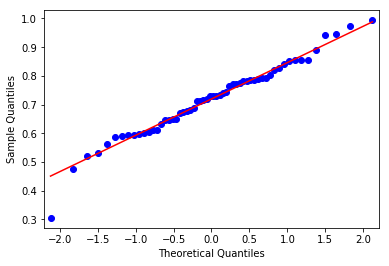

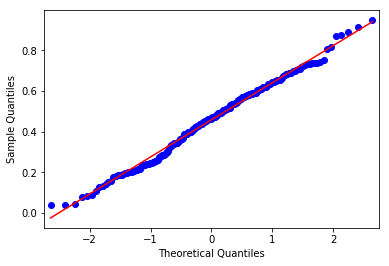

In [12]:
# q-q plot
qqplot(ITAita, line='s')
pyplot.show()
qqplot(ITAother, line='s')
pyplot.show()

In [13]:
# test di normalità
stat, p = shapiro(ITAita)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.979, p=0.426
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [14]:
# test di normalità
stat, p = shapiro(ITAother)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.991, p=0.139
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


verifichiamo che mediana e media siano simili dato che il test è per le medie ma noi parliamo della mediana nel blog post

In [15]:
np.median(ITAita), np.mean(ITAita)

(0.7298531783165041, 0.7196306635096099)

In [16]:
np.median(ITAother), np.mean(ITAother)

(0.4668159378016039, 0.45796574196808304)

In [54]:
# t-test senza ipotesi di omoschedasticità (equal_var = False)
ttest_ind(ITAita, ITAother, equal_var = False)

Ttest_indResult(statistic=12.773863615098408, pvalue=3.998477304728013e-24)

per un'ulteriore conferma proviamo a implementare anche il test non parametrico Mann-Whitney U

In [66]:
stats.mannwhitneyu(ITAita, ITAother)

MannwhitneyuResult(statistic=1627.0, pvalue=5.1950032678940496e-20)

## francia

In [18]:
FRAfra = df.loc[df.nazione_squadra == "Francia","Francia"]

In [19]:
FRAother = df.loc[df.nazione_squadra != "Francia","Francia"]

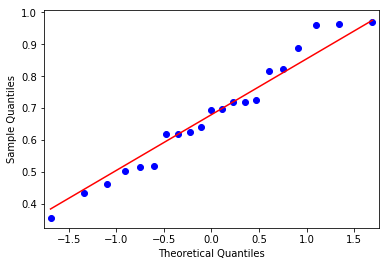

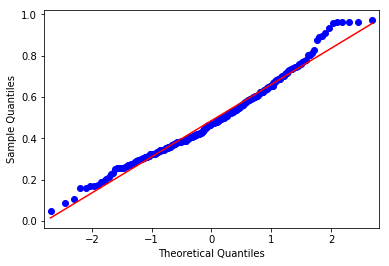

In [20]:
# q-q plot
qqplot(FRAfra, line='s')
pyplot.show()
qqplot(FRAother, line='s')
pyplot.show()

In [21]:
# test di normalità
stat, p = shapiro(FRAfra)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.961, p=0.529
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [22]:
# test di normalità
stat, p = shapiro(FRAother)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.979, p=0.000
Il campione non ha una distribuzione Gaussiana (rigettiamo H0)


Non abbiamo l'ipotesi di normalità quindi usiamo il test Mann-Whitney U

In [23]:
np.median(FRAfra), np.mean(FRAfra)

(0.6928960638075372, 0.6797578858426897)

In [24]:
np.median(FRAother), np.mean(FRAother)

(0.4689847328133892, 0.4851552766315552)

In [62]:
stats.mannwhitneyu(FRAfra, FRAother)

MannwhitneyuResult(statistic=1255.0, pvalue=6.3075500159245805e-06)

## inghilterra

In [26]:
INGing = df.loc[df.nazione_squadra == "Inghilterra","Inghilterra"]

In [27]:
INGother = df.loc[df.nazione_squadra != "Inghilterra","Inghilterra"]

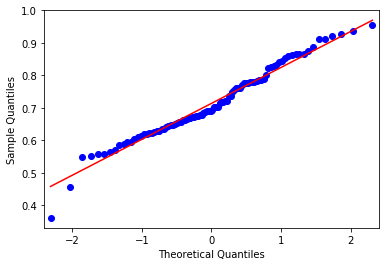

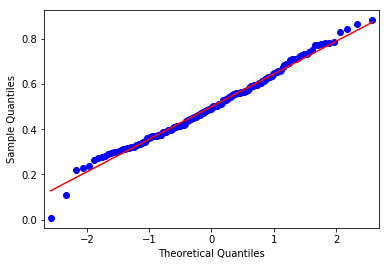

In [28]:
# q-q plot
qqplot(INGing, line='s')
pyplot.show()
qqplot(INGother, line='s')
pyplot.show()

In [29]:
# test di normalità
stat, p = shapiro(INGing)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.979, p=0.120
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [30]:
# test di normalità
stat, p = shapiro(INGother)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.992, p=0.310
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [31]:
np.median(INGing), np.mean(INGing)

(0.6931783588979756, 0.7140756977797795)

In [32]:
np.median(INGother), np.mean(INGother)

(0.4941720445855291, 0.5007175770033756)

In [55]:
ttest_ind(INGing,INGother, equal_var = False)

Ttest_indResult(statistic=14.02947601617041, pvalue=5.935886347431677e-33)

In [68]:
stats.mannwhitneyu(INGing, INGother)

MannwhitneyuResult(statistic=2385.0, pvalue=2.109313286605973e-26)

## germania

In [34]:
GERger = df.loc[df.nazione_squadra == "Germania","Germania"]

In [35]:
GERother = df.loc[df.nazione_squadra != "Germania","Germania"]

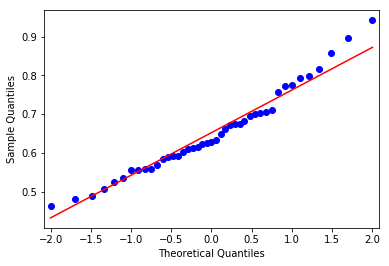

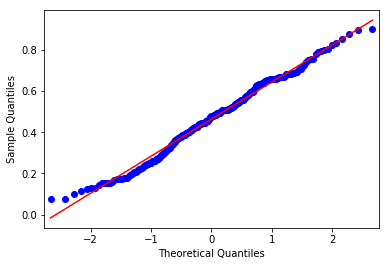

In [36]:
# q-q plot
qqplot(GERger, line='s')
pyplot.show()
qqplot(GERother, line='s')
pyplot.show()

In [37]:
# test di normalità
stat, p = shapiro(GERger)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.966, p=0.224
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [64]:
# test di normalità
stat, p = shapiro(GERother)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.987, p=0.020
Il campione non ha una distribuzione Gaussiana (rigettiamo H0)


Non abbiamo l'ipotesi di normalità quindi usiamo il test Mann-Whitney U signed-rank

In [59]:
np.median(GERger), np.mean(GERger)

(0.6290081663306265, 0.6522471942647693)

In [60]:
np.median(GERother), np.mean(GERother)

(0.476796627756289, 0.46407925504314407)

In [70]:
stats.mannwhitneyu(GERger, GERother)

MannwhitneyuResult(statistic=2160.0, pvalue=8.222125668810141e-11)

## spagna

In [42]:
SPAspa = df.loc[df.nazione_squadra == "Spagna","Spagna"]

In [43]:
SPAother = df.loc[df.nazione_squadra != "Spagna","Spagna"]

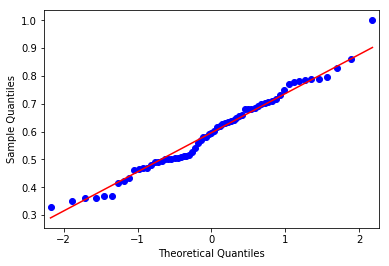

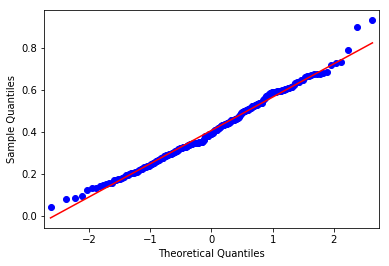

In [44]:
# q-q plot
qqplot(SPAspa, line='s')
pyplot.show()
qqplot(SPAother, line='s')
pyplot.show()

In [56]:
# test di normalità
stat, p = shapiro(SPAspa)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.980, p=0.373
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [57]:
# test di normalità
stat, p = shapiro(SPAother)
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Il campione ha una distribuzione Gaussiana (non rigettiamo H0)')
else:
    print('Il campione non ha una distribuzione Gaussiana (rigettiamo H0)')

Statistics=0.989, p=0.067
Il campione ha una distribuzione Gaussiana (non rigettiamo H0)


In [47]:
np.median(SPAspa), np.mean(SPAspa)

(0.5950386930055677, 0.5960232652218929)

In [48]:
np.median(SPAother), np.mean(SPAother)

(0.3891427957674789, 0.4053538464033888)

In [49]:
ttest_ind(SPAspa,SPAother)

Ttest_indResult(statistic=8.86338206972092, pvalue=7.218792159733735e-17)

In [69]:
stats.mannwhitneyu(SPAspa, SPAother)

MannwhitneyuResult(statistic=2898.0, pvalue=2.223124364052148e-15)